In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

In [2]:
ls /ihme/costeffectiveness/results/vivarium_nih_us_cvd/model_8/alabama/2022_11_15_10_25_28/count_data/

deaths.csv                             risk_exposure_time.hdf
deaths.hdf                             sbp_medication_person_time.csv
healthcare_visits.csv                  sbp_medication_person_time.hdf
healthcare_visits.hdf                  state_person_time.csv
ldlc_medication_person_time.csv        state_person_time.hdf
ldlc_medication_person_time.hdf        transition_count.csv
outreach_intervention_person_time.csv  transition_count.hdf
outreach_intervention_person_time.hdf  ylds.csv
population.csv                         ylds.hdf
population.hdf                         ylls.csv
risk_exposure_time.csv                 ylls.hdf


In [3]:
sim_results_dir = '/ihme/costeffectiveness/results/vivarium_nih_us_cvd/model_8/alabama/2022_11_15_10_25_28/count_data/'

In [14]:
risk_exp = pd.read_csv(sim_results_dir + 'risk_exposure_time.csv')
sbp = risk_exp.loc[risk_exp['risk']=='high_systolic_blood_pressure']
sbp.head()

,Unnamed: 0,sex,year,risk,measure,input_draw,scenario,age,value
450,450,female,2023,high_systolic_blood_pressure,risk_exposure_time,29,baseline,25_to_29,3.209533e+06
451,451,female,2023,high_systolic_blood_pressure,risk_exposure_time,29,outreach_100,25_to_29,3.208678e+06
452,452,female,2023,high_systolic_blood_pressure,risk_exposure_time,29,outreach_50,25_to_29,3.209129e+06
453,453,female,2023,high_systolic_blood_pressure,risk_exposure_time,29,baseline,30_to_34,3.369457e+06
454,454,female,2023,high_systolic_blood_pressure,risk_exposure_time,29,outreach_100,30_to_34,3.367655e+06


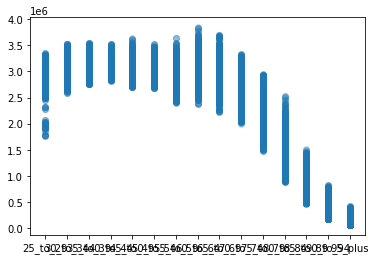

In [19]:
plt.scatter(sbp.age, sbp.value, alpha=0.2)

## Trying the Interactive Sim

In [4]:
from vivarium import InteractiveContext, Artifact

from datetime import datetime, timedelta
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd, numpy as np
pd.set_option('display.max_rows', 60)
import seaborn as sns

import numpy as np
import researchpy as rp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.backends.backend_pdf import PdfPages

In [37]:
path = Path('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')
path

PosixPath('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')

In [54]:
sim = InteractiveContext(Path(path), setup=False)
sim.configuration.update({
                          'population':
                              {'population_size': 1_000,
                              },
                          'intervention':
                              {'scenario': 'outreach_100',
                              },
                          'outreach':
                              {'exposure': 1,
                              },
                          'polypill':
                              {'exposure': 1,
                              },
                          'time':
                              {'start':
                                  {'year': 2030
                                  }
                              }
                          }
                        )
sim.setup()


2023-02-24 08:46:54.237 | DEBUG    | vivarium.framework.values:register_value_modifier:392 - Registering metrics.1.population_manager.metrics as modifier to metrics
2023-02-24 08:46:54.243 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Running simulation from artifact located at /ihme/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf.
2023-02-24 08:46:54.244 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact base filter terms are ['draw == 0'].
2023-02-24 08:46:54.245 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:68 - Artifact additional filter terms are None.
2023-02-24 08:46:54.784 | DEBUG    | vivarium.framework.values:_register_value_producer:338 - Registering value pipeline cause_specific_mortality_rate
2023-02-24 08:46:54.785 | DEBUG    | vivarium.framework.values:_register_value_producer:338 - Registering value pipeline mortality_rate
2023-02-24 08:46:55.315 | DEBUG    | vivarium.framework.values:_regis

In [55]:
pop0 = sim.get_population()
pop0.head()

,tracked,sex,location,age,alive,entrance_time,exit_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,sbp_medication_adherence,sbp_multiplier,ldlc_medication,ldlc_multiplier,polypill,sbp_medication,ldlc_medication_adherence,outreach,visit_type,scheduled_date
0,True,Female,Alabama,75.408993,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,cat2,1.0,no_treatment,1.0,cat1,one_drug_half_dose_efficacy,cat3,cat1,none,2030-02-21 18:14:57.676214400
1,True,Female,Alabama,13.508702,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,cat1,1.0,no_treatment,1.0,cat1,no_treatment,cat3,cat1,none,NaT
2,True,Female,Alabama,22.439328,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,cat3,1.0,no_treatment,1.0,cat1,no_treatment,cat3,cat1,none,NaT
3,True,Female,Alabama,17.426400,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,cat3,1.0,no_treatment,1.0,cat1,no_treatment,cat3,cat1,none,NaT
4,True,Male,Alabama,23.566028,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,cat1,1.0,no_treatment,1.0,cat1,no_treatment,cat3,cat1,none,NaT


In [50]:
data1 = pd.concat([pop0,
                   sim.get_value('high_ldl_cholesterol.exposure')(pop0.index).rename('high_ldl'),
                   sim.get_value('high_systolic_blood_pressure.exposure')(pop0.index).rename('high_sbp'),
                   sim.get_value('high_fasting_plasma_glucose.exposure')(pop0.index).rename('high_fpg'),
                   sim.get_value('high_body_mass_index_in_adults.exposure')(pop0.index).rename('high_bmi'),
                  ], axis=1)
data1 = data1.loc[(data1.alive == 'alive') & (data1.age > 25)]
data1['scenario'] = 'baseline'
data1.head()

,tracked,sex,location,age,alive,entrance_time,exit_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,sbp_medication,ldlc_medication_adherence,outreach,visit_type,scheduled_date,high_ldl,high_sbp,high_fpg,high_bmi,scenario
0,True,Female,Alabama,75.408993,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,one_drug_half_dose_efficacy,cat3,cat1,none,2030-02-21 18:14:57.676214400,3.204160,183.767454,6.668391,18.549818,baseline
5,True,Female,Alabama,67.488238,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.458914,118.392591,4.692389,57.579373,baseline
6,True,Male,Alabama,69.323383,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.945819,128.287644,7.032364,31.164554,baseline
7,True,Female,Alabama,50.139342,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.176885,118.694070,5.550617,30.073668,baseline
8,True,Male,Alabama,37.425828,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat2,cat1,none,NaT,2.904463,120.477459,6.401107,45.130284,baseline


In [53]:
data_out = pd.concat([pop0,
                   sim.get_value('high_ldl_cholesterol.exposure')(pop0.index).rename('high_ldl'),
                   sim.get_value('high_systolic_blood_pressure.exposure')(pop0.index).rename('high_sbp'),
                   sim.get_value('high_fasting_plasma_glucose.exposure')(pop0.index).rename('high_fpg'),
                   sim.get_value('high_body_mass_index_in_adults.exposure')(pop0.index).rename('high_bmi'),
                  ], axis=1)
data_out = data_out.loc[(data_out.alive == 'alive') & (data_out.age > 25)]
data_out['scenario'] = 'outreach'
data_out.head()

,tracked,sex,location,age,alive,entrance_time,exit_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,sbp_medication,ldlc_medication_adherence,outreach,visit_type,scheduled_date,high_ldl,high_sbp,high_fpg,high_bmi,scenario
0,True,Female,Alabama,75.408993,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,one_drug_half_dose_efficacy,cat3,cat1,none,2030-02-21 18:14:57.676214400,3.204160,183.767454,6.668391,18.549818,outreach
5,True,Female,Alabama,67.488238,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.458914,118.392591,4.692389,57.579373,outreach
6,True,Male,Alabama,69.323383,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.945819,128.287644,7.032364,31.164554,outreach
7,True,Female,Alabama,50.139342,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.176885,118.694070,5.550617,30.073668,outreach
8,True,Male,Alabama,37.425828,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat2,cat1,none,NaT,2.904463,120.477459,6.401107,45.130284,outreach


In [56]:
data_poly = pd.concat([pop0,
                   sim.get_value('high_ldl_cholesterol.exposure')(pop0.index).rename('high_ldl'),
                   sim.get_value('high_systolic_blood_pressure.exposure')(pop0.index).rename('high_sbp'),
                   sim.get_value('high_fasting_plasma_glucose.exposure')(pop0.index).rename('high_fpg'),
                   sim.get_value('high_body_mass_index_in_adults.exposure')(pop0.index).rename('high_bmi'),
                  ], axis=1)
data_poly = data_poly.loc[(data_poly.alive == 'alive') & (data_poly.age > 25)]
data_poly['scenario'] = 'polypill'
data_poly.head()

,tracked,sex,location,age,alive,entrance_time,exit_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,sbp_medication,ldlc_medication_adherence,outreach,visit_type,scheduled_date,high_ldl,high_sbp,high_fpg,high_bmi,scenario
0,True,Female,Alabama,75.408993,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,one_drug_half_dose_efficacy,cat3,cat1,none,2030-02-21 18:14:57.676214400,3.204160,183.767454,6.668391,18.549818,polypill
5,True,Female,Alabama,67.488238,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.458914,118.392591,4.692389,57.579373,polypill
6,True,Male,Alabama,69.323383,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.945819,128.287644,7.032364,31.164554,polypill
7,True,Female,Alabama,50.139342,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.176885,118.694070,5.550617,30.073668,polypill
8,True,Male,Alabama,37.425828,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat2,cat1,none,NaT,2.904463,120.477459,6.401107,45.130284,polypill


In [57]:
data_all = pd.concat([data1,data_out,data_poly])
data_all

,tracked,sex,location,age,alive,entrance_time,exit_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,sbp_medication,ldlc_medication_adherence,outreach,visit_type,scheduled_date,high_ldl,high_sbp,high_fpg,high_bmi,scenario
0,True,Female,Alabama,75.408993,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,one_drug_half_dose_efficacy,cat3,cat1,none,2030-02-21 18:14:57.676214400,3.204160,183.767454,6.668391,18.549818,baseline
5,True,Female,Alabama,67.488238,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.458914,118.392591,4.692389,57.579373,baseline
6,True,Male,Alabama,69.323383,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.945819,128.287644,7.032364,31.164554,baseline
7,True,Female,Alabama,50.139342,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,3.176885,118.694070,5.550617,30.073668,baseline
8,True,Male,Alabama,37.425828,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat2,cat1,none,NaT,2.904463,120.477459,6.401107,45.130284,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,Female,Alabama,65.623244,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,one_drug_half_dose_efficacy,cat1,cat1,none,NaT,3.129547,105.056249,5.947266,34.395460,polypill
996,True,Male,Alabama,48.184861,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,two_drug_half_dose_efficacy,cat3,cat1,none,NaT,2.159301,107.836361,4.589752,43.523741,polypill
997,True,Female,Alabama,32.884541,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,one_drug_half_dose_efficacy,cat1,cat1,none,NaT,2.893037,114.414777,5.897259,7.950934,polypill
998,True,Female,Alabama,36.058418,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,no_treatment,cat3,cat1,none,NaT,1.547647,104.161019,5.588151,20.343589,polypill


[Text(0.5, 0, 'BMI'), Text(0, 0.5, 'Percent of Simulants')]

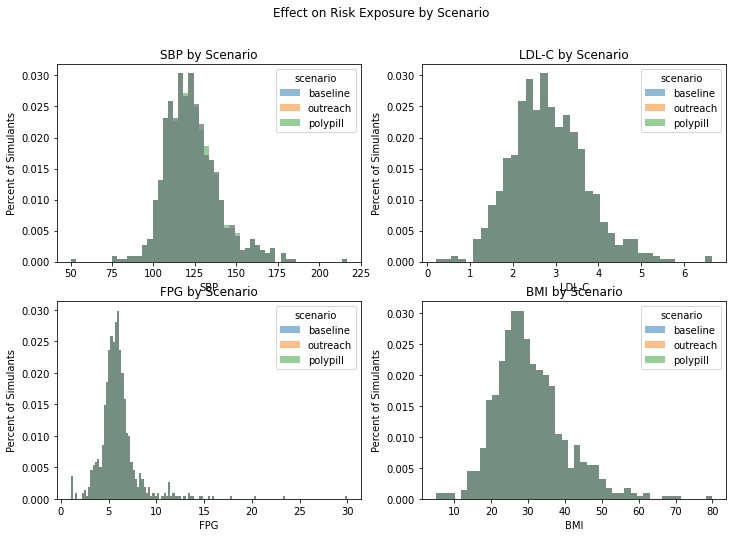

In [58]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

fig.suptitle('Effect on Risk Exposure by Scenario')

sns.histplot(ax=axes[0, 0], data=data_all, x='high_sbp', hue='scenario', stat='probability', edgecolor=None) 
ax=axes[0, 0]
ax.set_title('SBP by Scenario') 
ax.set(xlabel='SBP', ylabel='Percent of Simulants')

sns.histplot(ax=axes[0, 1], data=data_all, x='high_ldl', hue='scenario', stat='probability', edgecolor=None)
ax=axes[0, 1]
ax.set_title('LDL-C by Scenario')
ax.set(xlabel='LDL-C', ylabel='Percent of Simulants')

sns.histplot(ax=axes[1, 0], data=data_all, x='high_fpg', hue='scenario', stat='probability', edgecolor=None)
ax=axes[1, 0]
ax.set_title('FPG by Scenario')
ax.set(xlabel='FPG', ylabel='Percent of Simulants')

sns.histplot(ax=axes[1, 1], data=data_all, x='high_bmi', hue='scenario', stat='probability', edgecolor=None)
ax=axes[1, 1]
ax.set_title('BMI by Scenario')
ax.set(xlabel='BMI', ylabel='Percent of Simulants')

In [18]:
#Was the same figure as the above but for SBP only 

#fig, ax = plt.subplots(figsize=(10, 7))
#sns.histplot(data=data1, x='high_sbp', hue='sex', stat='probability', edgecolor=None)
#ax.set_title('Risk Factors by Scenario')
#ax.set(xlabel='SBP', ylabel='Percent of Simulants')

In [59]:
data_all['sbp_binary'] = np.where(data_all['high_sbp']<120,'Normal',np.where(data_all['high_sbp']<130,'Controlled','Uncontrolled'))
data_all['fpg_binary'] = np.where(data_all['high_fpg']<5.6,'Normal',np.where(data_all['high_fpg']<6.9,'Prediabetic','Diabetic'))
data_all['ldl_binary'] = np.where(data_all['high_ldl']<3.4,'Normal',np.where(data_all['high_ldl']<4.91,'High','Very_High'))
data_all['bmi_binary'] = np.where(data_all['high_bmi']<25,'Normal',np.where(data_all['high_bmi']<30,'Overweight','Obese'))
data_all.head()

,tracked,sex,location,age,alive,entrance_time,exit_time,years_of_life_lost,cause_of_death,years_lived_with_disability,...,scheduled_date,high_ldl,high_sbp,high_fpg,high_bmi,scenario,sbp_binary,fpg_binary,ldl_binary,bmi_binary
0,True,Female,Alabama,75.408993,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,2030-02-21 18:14:57.676214400,3.204160,183.767454,6.668391,18.549818,baseline,Uncontrolled,Prediabetic,Normal,Normal
5,True,Female,Alabama,67.488238,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,NaT,3.458914,118.392591,4.692389,57.579373,baseline,Normal,Normal,High,Obese
6,True,Male,Alabama,69.323383,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,NaT,3.945819,128.287644,7.032364,31.164554,baseline,Controlled,Diabetic,High,Obese
7,True,Female,Alabama,50.139342,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,NaT,3.176885,118.694070,5.550617,30.073668,baseline,Normal,Normal,Normal,Obese
8,True,Male,Alabama,37.425828,alive,2029-12-04,NaT,0.0,not_dead,0.0,...,NaT,2.904463,120.477459,6.401107,45.130284,baseline,Controlled,Prediabetic,Normal,Obese


In [60]:
#For SBP

sbp_normal_base = len((data_all.loc[(data_all.sbp_binary == 'Normal') & (data_all.scenario == 'baseline')]))/len(data_all.loc[(data_all.scenario == 'baseline')])
sbp_normal_out = len((data_all.loc[(data_all.sbp_binary == 'Normal') & (data_all.scenario == 'outreach')]))/len(data_all.loc[(data_all.scenario == 'outreach')])
sbp_normal_poly = len((data_all.loc[(data_all.sbp_binary == 'Normal') & (data_all.scenario == 'polypill')]))/len(data_all.loc[(data_all.scenario == 'polypill')])

sbp_controlled_base = len((data_all.loc[(data_all.sbp_binary == 'Controlled') & (data_all.scenario == 'baseline')]))/len(data_all.loc[(data_all.scenario == 'baseline')])
sbp_controlled_out = len((data_all.loc[(data_all.sbp_binary == 'Controlled') & (data_all.scenario == 'outreach')]))/len(data_all.loc[(data_all.scenario == 'outreach')])
sbp_controlled_poly = len((data_all.loc[(data_all.sbp_binary == 'Controlled') & (data_all.scenario == 'polypill')]))/len(data_all.loc[(data_all.scenario == 'polypill')])

sbp_uncontrolled_base = len((data_all.loc[(data_all.sbp_binary == 'Uncontrolled') & (data_all.scenario == 'baseline')]))/len(data_all.loc[(data_all.scenario == 'baseline')])
sbp_uncontrolled_out = len((data_all.loc[(data_all.sbp_binary == 'Uncontrolled') & (data_all.scenario == 'outreach')]))/len(data_all.loc[(data_all.scenario == 'outreach')])
sbp_uncontrolled_poly = len((data_all.loc[(data_all.sbp_binary == 'Uncontrolled') & (data_all.scenario == 'polypill')]))/len(data_all.loc[(data_all.scenario == 'polypill')])

sbp_height_base = [sbp_normal_base, sbp_controlled_base, sbp_uncontrolled_base]
sbp_height_out = [sbp_normal_out, sbp_controlled_out, sbp_uncontrolled_out]
sbp_height_poly = [sbp_normal_poly, sbp_controlled_poly, sbp_uncontrolled_poly]
print(sbp_height_base, sbp_height_out, sbp_height_poly)

[0.4673913043478261, 0.24864130434782608, 0.28396739130434784] [0.4673913043478261, 0.24864130434782608, 0.28396739130434784] [0.4673913043478261, 0.24592391304347827, 0.2866847826086957]


In [35]:
#For FPG

fpg_normal = len(data1.loc[data1.fpg_binary == 'Normal'])/len(data1)
fpg_prediabetic = len(data1.loc[data1.fpg_binary == 'Prediabetic'])/len(data1)
fpg_diabetic = len(data1.loc[data1.fpg_binary == 'Diabetic'])/len(data1)
fpg_height = [fpg_normal, fpg_prediabetic, fpg_diabetic]
fpg_height

[0.4626865671641791, 0.3556769722814499, 0.181636460554371]

In [34]:
#For LDL-C

ldl_normal = len(data1.loc[data1.ldl_binary == 'Normal'])/len(data1)
ldl_high = len(data1.loc[data1.ldl_binary == 'High'])/len(data1)
ldl_vhigh = len(data1.loc[data1.ldl_binary == 'Very_High'])/len(data1)
ldl_height = [ldl_normal, ldl_high, ldl_vhigh]
ldl_height

[0.7385394456289979, 0.24320362473347548, 0.01825692963752665]

In [37]:
#For BMI

bmi_normal = len(data1.loc[data1.bmi_binary == 'Normal'])/len(data1)
bmi_overweight = len(data1.loc[data1.bmi_binary == 'Overweight'])/len(data1)
bmi_obese = len(data1.loc[data1.bmi_binary == 'Obese'])/len(data1)
bmi_height = [bmi_normal, bmi_overweight, bmi_obese]
bmi_height

[0.29930703624733473, 0.24093816631130063, 0.4597547974413646]

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

fig.suptitle('Effect on Risk Exposure by Scenario')

axes[0,0].set_title(name)
group.plot(kind="bar", x = "attribute", y="population", ax=axes[i], legend=False)
axes[i].set_ylabel("count")
axes[i].set_xlabel("")

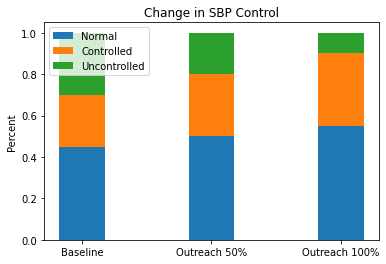

In [21]:
labels = ['Baseline', 'Outreach 50%', 'Outreach 100%']
Normal = [0.45, 0.5, 0.55]
Controlled = [0.25, 0.3, 0.35]
Uncontrolled = [0.3, 0.2, 0.1]
width = 0.35       # the width of the bars: can also be len(x) sequence
bottom2 = [0.7,0.8,0.9]

fig, ax = plt.subplots()

ax.bar(labels, Normal, width, label='Normal')
ax.bar(labels, Controlled, width, bottom=Normal,label='Controlled')
ax.bar(labels, Uncontrolled, width, bottom=bottom2,label='Uncontrolled')

ax.set_ylabel('Percent')
ax.set_title('Change in SBP Control')
ax.legend()

plt.show()

In [139]:
dalys = {'State':['Alabama','Alaska','Arizona','Arkansas','Calfornia','Colorado','Conneticut','Delware','Florida','Hawaii','Idaho','Indiana','Iowa','Kanasa','Kentucky','Lousiana'], 
         'Polypill':[7,11,10,11,12,14,17,25,22,28,30,34,36,42,45,50],
         'Outreach':[3,5,8,10,13,15,19,19,21,24,25,25,27,29,30,33],
        'Year':[2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038]}
dalys = pd.DataFrame(dalys)

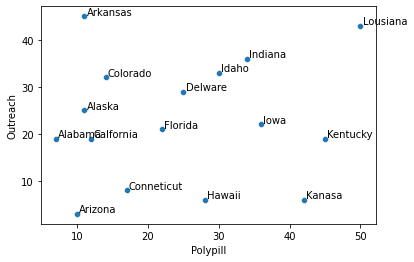

In [136]:
sns.scatterplot(data=dalys,x='Polypill',y='Outreach')
for i in range(dalys.shape[0]):
    plt.text(x=dalys.Polypill[i]+0.3,y=dalys.Outreach[i]+0.3,s=dalys.State[i], 
          fontdict=dict(color='black',size=10))

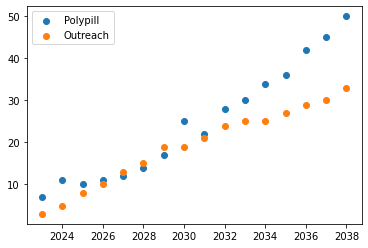

In [143]:
plt.scatter(dalys.Year,dalys.Polypill,label='Polypill')
plt.scatter(dalys.Year,dalys.Outreach,label='Outreach')
plt.legend()

In [146]:
dalys = {'Scenario':['Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Polypill','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach','Outreach'], 
         'Dalys':[7,11,10,11,12,14,17,25,22,28,30,34,36,42,45,50,3,5,8,10,13,15,19,19,21,24,25,25,27,29,30,33]}


[Text(0.5, 0, 'Dalys'), Text(0, 0.5, 'Percent of States')]

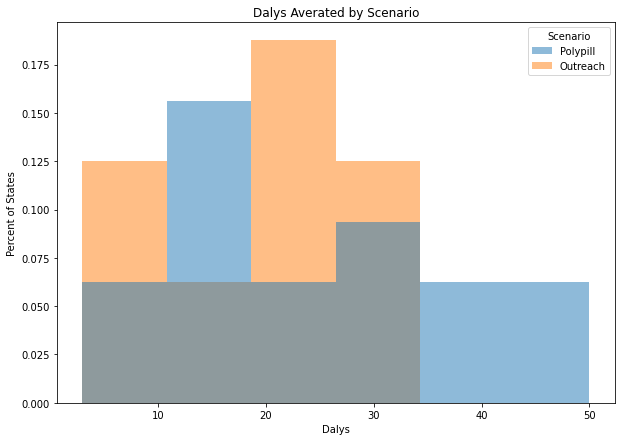

In [147]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(data=dalys, x='Dalys', hue= 'Scenario', stat='probability', edgecolor=None)
ax.set_title('Dalys Averated by Scenario')
ax.set(xlabel='Dalys', ylabel='Percent of States')